# Bereinigung

### Setup

In [ ]:
# Setup
from mlxtend.frequent_patterns import apriori, association_rules
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.plotting

In [61]:
# Info über Spalten (detusche Übersetzungen, ...)
columns = {
    "fixed acidity": {
        "de": "Fester Säuregehalt [g/L]",
    },
    "volatile acidity": {
        "de": "Flüchtiger Säuregehalt [g/L]",
    },
    "citric acid": {
        "de": "Citronensäure [g/L]",
    },
    "residual sugar": {
        "de": "Restzucker [g/L]",
        #"fixed_filter": 10.0,
    },
    "chlorides": {
        "de": "Chloride [g/L]",
        #"fixed_filter": 0.3,
    },
    "free sulfur dioxide": {
        "de": "Freie Schwefeloxide [mg/L]",
    },
    "total sulfur dioxide": {
        "de": "Schwefeloxide [mg/L]",
    },
    "density": {
        "de": "Dichte [g/cm3]",
    },
    "pH": {
        "de": "pH-Wert",
    },
    "sulphates": {
        "de": "Sulfate [g/L]",
    },
    "alcohol": {
        "de": "Alkohol [vol.%]",
    },
    "quality": {
        "de": "Qualität",
    },
}

In [ ]:
# Einelsen der Daten
df_red = pd.read_csv('winequality-red.csv', sep=';', header=0) 
df_white = pd.read_csv('winequality-white.csv', sep=';', header=0) 

### Null-Werte

In [ ]:
# Null-Werte prüfen
print(df_red.isna().sum().sum())
print(df_white.isna().sum().sum())

### Ausreißer

In [ ]:
# Svg has better quality
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

def hist(df):
    fig = plt.figure(
        num="Histogramm",
        figsize=(12,9),
    )
    fig.subplots_adjust(hspace=0.4, wspace=0.5)

    for i, column in enumerate(columns.keys()):
        f = fig.add_subplot(4, 3, i+1)
        f.set_title(columns[column]["de"])
        f.hist(df[column], bins=20)
        f.axvline(df[column].mean(), color='k', linestyle='dashed', linewidth=1)
        # TODO: print outliers red
        # (https://stackoverflow.com/questions/49290266/python-matplotlib-histogram-specify-different-colours-for-different-bars)

    plt.show()

def box_plot(df):
    fig = plt.figure(
        num="Box Plot",
        figsize=(12,9),
    )
    fig.subplots_adjust(hspace=0.4, wspace=0.5)

    for i, column in enumerate(columns.keys()):
        f = fig.add_subplot(4, 3, i+1)
        f.set_title(columns[column]["de"])
        f.boxplot(df[column], vert=False)

    plt.show()

def print_outliers(df, min_z_score):
    # Z-Score ist die Abweichung vom Mittelwert in Standardabweichungen
    # betragsmäßig hoher Z-Score deutet auf Ausreißer hin.
    z = np.abs(stats.zscore(df))

    for i, column in enumerate(columns):
        print("\n")
        print(column)

        filter = (z[column] > min_z_score)
        if "fixed_filter" in columns[column].keys():
            filter = (df[column] > columns[column]["fixed_filter"])
        print(df[filter].sort_values(by=column))

In [ ]:
hist(df_red)
box_plot(df_red)
#print_outliers(df_red, 2.5)

In [ ]:
hist(df_white)
box_plot(df_white)
#print_outliers(df_white, 3.5)

### Ergebnisse

Es gibt viele Ausreißer.
Fehlmessungen werden aufgrund physikalischer Zusammenhänge einiger Spalten ausgeschlossen.

Die Ausreißer sind vermutlich der Tatsache geschuldet, dass Wein ein Naturprodukt ist.
Da der Fokus nicht auf Nischenprodukten oder Ausschussware liegt, werden Ausreißer entfernt.

In [ ]:
# Extrem hohe Citronensäure, sehr hoher Alkohlgehalt, sehr niedriger PH-Wert
print(df_red.loc[652])

# Extrem hohe Citronensäure, sehr niedriger PH-Wert
# Extrem hohe Chlorid-Werte üblich bei Meernahen Weinanbaugebieten wie Portugal
# https://www.institut-heidger.de/anionen/.
print(df_red.loc[151])

### Datensatz bereinigen

In [ ]:
def remove_outliers(df, max_z_score):
    z = np.abs(stats.zscore(df.iloc[:,:-1]))
    #TODO: dont filter good/bad quality wines
    filter = (z < max_z_score).all(axis=1)
    return df[filter]

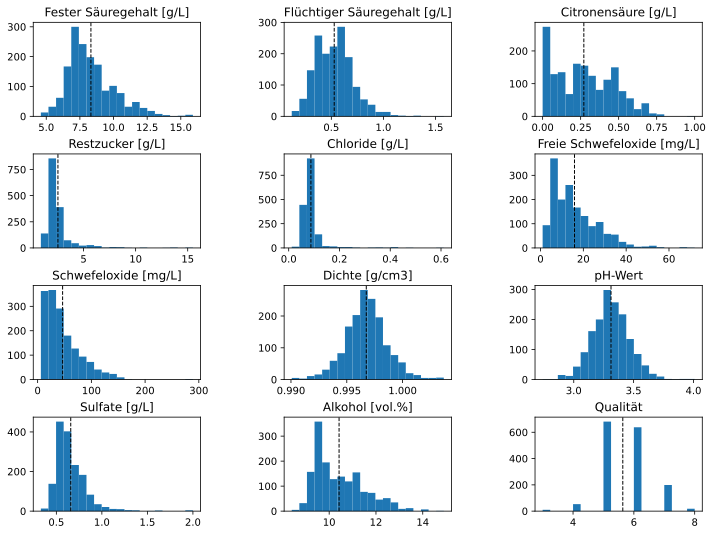

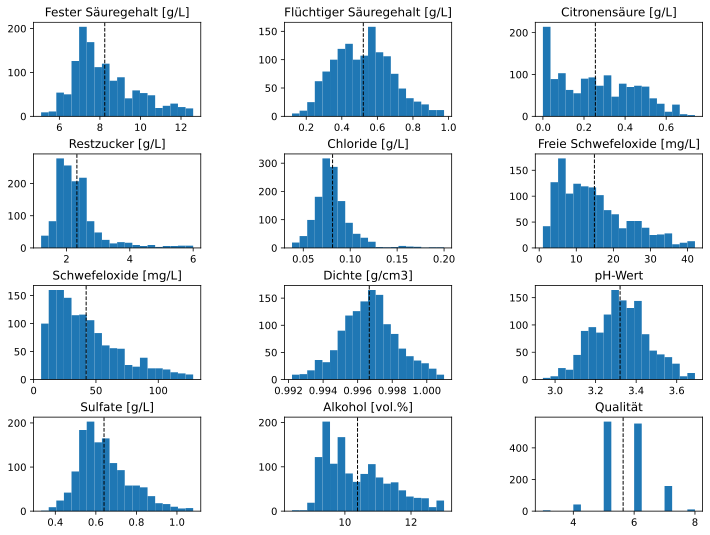

In [64]:
hist(df_red)
df = remove_outliers(df_red, 2.5)
hist(df)
df.to_csv('./winequality-red-filtered.csv', sep=';', header=True, index=False)

In [ ]:
hist(df_white)
df = remove_outliers(df_white, 2.5)
hist(df)
df.to_csv('./winequality-white-filtered.csv', sep=';', header=True, index=False)